![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)
## Models Implementation

In [74]:
import importlib
from helpers import utilities as utils

# Reload the module to reflect changes without restarting the kernel
importlib.reload(utils)

<module 'helpers.utilities' from 'e:\\Master_Program\\Practical_machine_Learning\\Final_Project_v2\\EmissionsML\\helpers\\utilities.py'>

In [3]:
X, y = utils.load_data('./preprocessed_data/final_dataset.csv', 
                       ['co2_avg', 'pm10_avg', 'pm25_avg', 'no2_avg']) 

In [4]:
X.head()

,road_classification,vkm_motorcycle,vkm_taxi,vkm_petrol_car,vkm_diesel_car,vkm_electric_car,vkm_petrol_phv,vkm_diesel_phv,vkm_electric_phv,vkm_petrol_lgv,...,vkm_hgvs_rigid_3_axles,vkm_hgvs_rigid_4_or_more_axles,vkm_hgvs_articulated_3_to_4_axles,vkm_hgvs_articulated_5_axles,vkm_hgvs_articulated_6_axles,vkm_buses,vkm_coaches,laei_zone_Inner London,laei_zone_Non-GLA,laei_zone_Outer London
0,0,2289.0,307.0,111810.0,77272.0,662.0,1881.0,1547.0,26.0,195.0,...,736.0,1451.0,531.0,2759.0,3659.0,0.0,327.0,0,1,0
1,0,2921.0,430.0,131006.0,90538.0,776.0,14550.0,11968.0,203.0,305.0,...,344.0,687.0,258.0,1289.0,1718.0,0.0,1160.0,0,1,0
2,0,1568.0,180.0,68868.0,47595.0,408.0,808.0,665.0,11.0,224.0,...,275.0,551.0,192.0,1042.0,1377.0,0.0,7746.0,0,1,0
3,0,48019.0,3777.0,1963886.0,1357242.0,11630.0,106644.0,87722.0,1488.0,8118.0,...,12679.0,25359.0,9172.0,48019.0,63396.0,0.0,97388.0,0,1,0
4,0,429.0,82.0,20315.0,14040.0,120.0,522.0,429.0,7.0,45.0,...,94.0,185.0,67.0,352.0,465.0,0.0,446.0,0,1,0


<hr style="border: 2px solid blue;">

### Step 2.1: XGBoost MultiOutputRegressor Regressor


=== XGBoost Regressor Evaluation Metrics ===


,MAE,R² Score,MSE,RMSE
co2_avg,1.052397,0.958323,5.303319e+01,7.282389
pm10_avg,0.000254,0.885536,3.375134e-06,0.001837
pm25_avg,0.000121,0.928753,6.683669e-07,0.000818
no2_avg,0.002305,0.962800,1.953587e-04,0.013977
Overall,0.263770,0.933853,1.325835e+01,3.641201


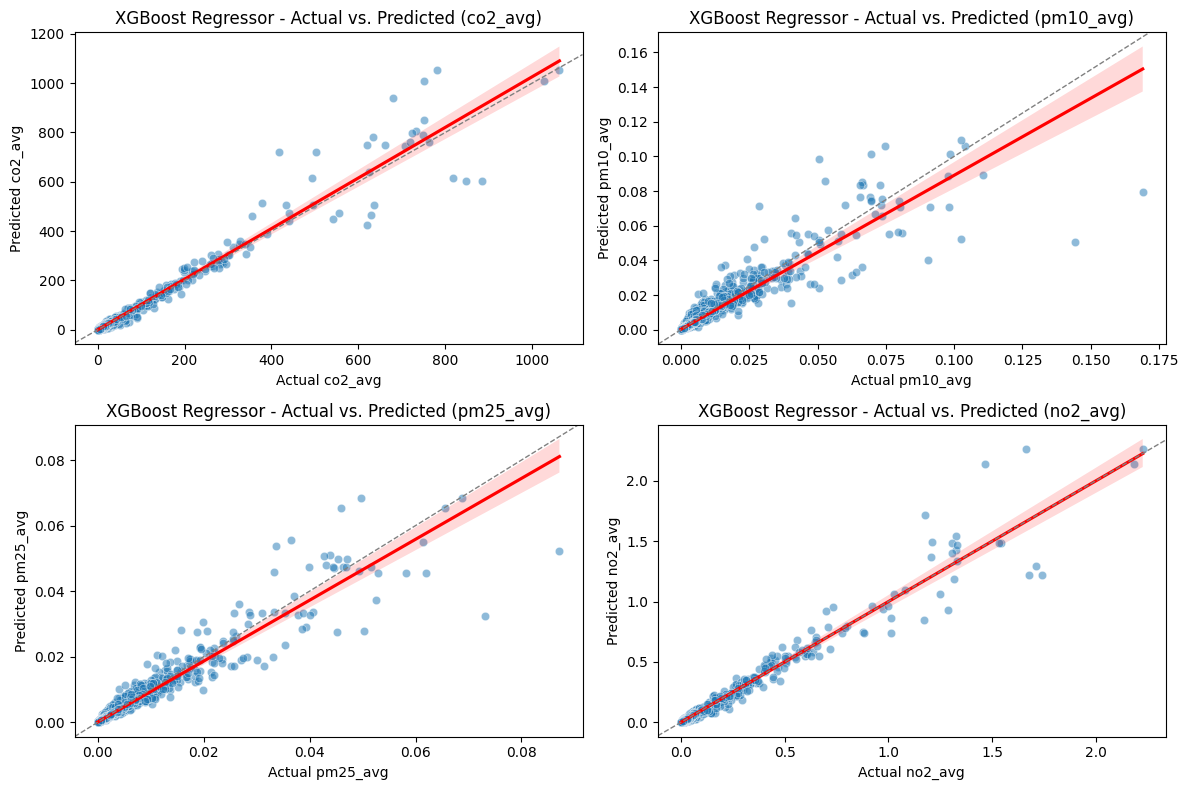

In [5]:
# implement multi-output regression using xgboost regressor
from sklearn.multioutput import MultiOutputRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale training data and store the scaler
X_train_scaled, _, scaler_X, _ = utils.scale_data(X_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, _, _, _ = utils.scale_data(X_test, scaler_X=scaler_X, fit_scaler=False)

# train the model
xgb = MultiOutputRegressor(XGBRegressor(objective='reg:squarederror', n_estimators=1000, 
                                        learning_rate=0.1, max_depth=6, random_state=42))
xgb.fit(X_train_scaled, y_train)

# predict the target values
y_pred = xgb.predict(X_test_scaled)

# calculate the mean squared error
eval_matrix = utils.evaluate_regressor(y_test, y_pred, model_name='XGBoost Regressor')

In [6]:
# save the xgboost model 
utils.save_model(xgb, './checkpoints/xgboost_regressor.pkl', scaler_X, target_columns=y.columns)

# load the xgboost model
(xgb, scaler_X, _, target_columns) = utils.load_model('./checkpoints/xgboost_regressor.pkl')

Model and additional data saved to ./checkpoints/xgboost_regressor.pkl
Model loaded from ./checkpoints/xgboost_regressor.pkl


In [7]:
xgb_predictions = utils.compare_predictions(y_test, y_pred, model_name='XGBoost Regressor')


=== XGBoost Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,0.623480,0.902914,0.000392,0.000459,0.000023,0.000028,0.000088,0.000124
1,0.338170,0.666502,0.000257,0.000239,0.006150,0.005857,0.008398,0.009182
2,1.008083,1.035044,0.002120,0.002224,0.000523,0.000510,0.000698,0.000915
3,39.124589,34.433609,0.003739,0.003792,0.000280,0.000271,0.000586,0.000901
4,5.878934,4.095435,0.000381,0.000353,0.001718,0.001612,0.035304,0.032522


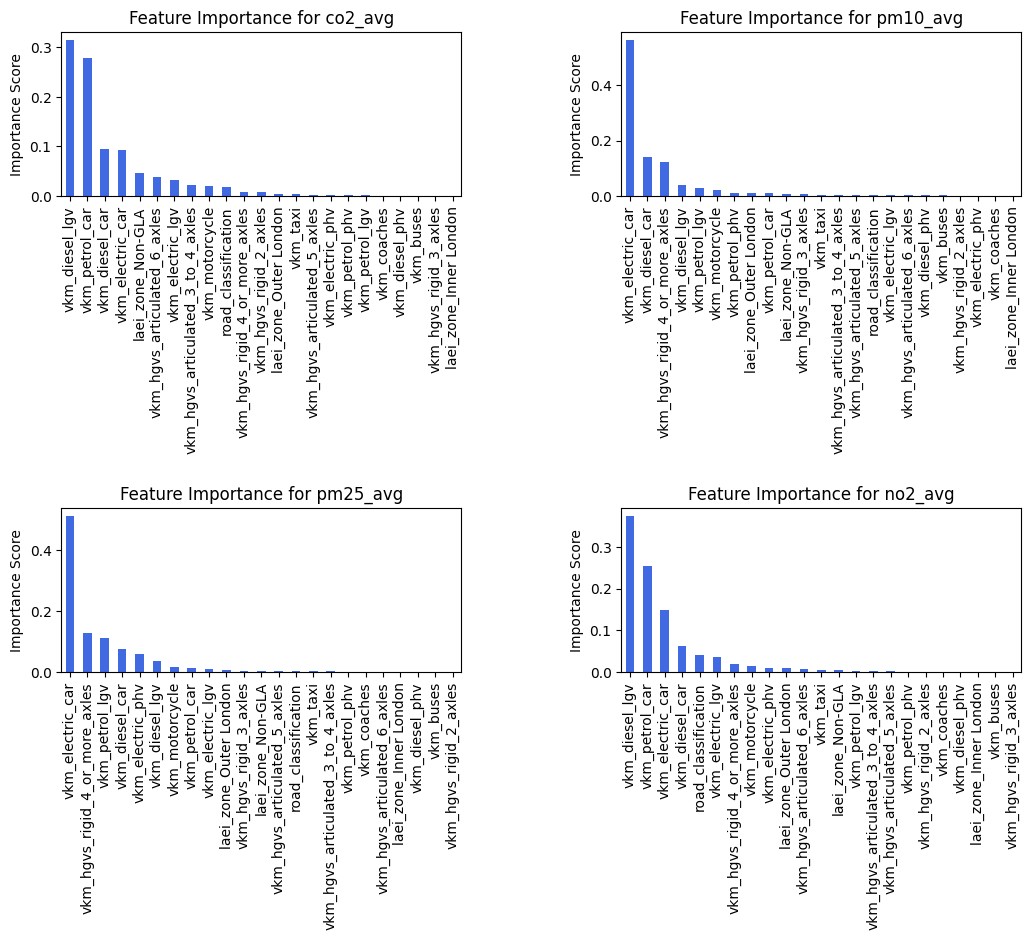

In [8]:
# Feature importance from RF model (sum importance across both targets)
utils.plot_feature_importance(xgb.estimators_, X, y)

<hr style="border: 2px solid blue;">

### Step 2.2: Random Forest Multioutput Regressor

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
rf_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_features=0.5, random_state=42, n_jobs=-1))
rf_model.fit(X_train_scaled, y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(max_features=0.5,
                                                     n_jobs=-1,
                                                     random_state=42))

In [11]:
y_pred_rf = rf_model.predict(X_test_scaled)


=== Random Forest Regressor Evaluation Metrics ===


,MAE,R² Score,MSE,RMSE
co2_avg,0.888571,0.988435,1.471618e+01,3.836167
pm10_avg,0.000241,0.901280,2.910909e-06,0.001706
pm25_avg,0.000108,0.944761,5.181936e-07,0.000720
no2_avg,0.002087,0.984229,8.282286e-05,0.009101
Overall,0.222752,0.954676,3.679066e+00,1.918089


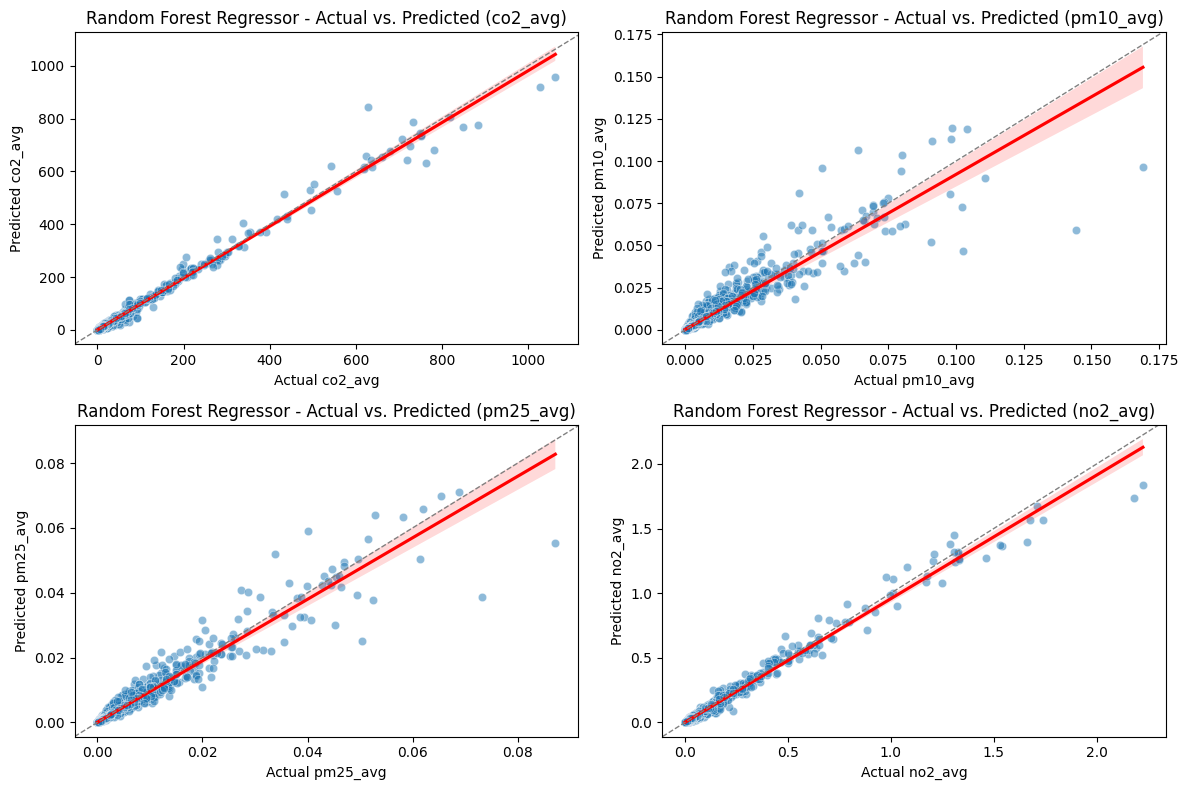

In [12]:
# Evaluate performance
eval_matrix_rf = utils.evaluate_regressor(y_test, y_pred_rf, model_name='Random Forest Regressor')

In [13]:
# save the random forest model 
utils.save_model(rf_model, './checkpoints/random_forest_regressor.pkl', scaler_X, target_columns=y.columns)

# load the random forest model
(rf_model, scaler_X, _, target_columns) = utils.load_model('./checkpoints/random_forest_regressor.pkl')

Model and additional data saved to ./checkpoints/random_forest_regressor.pkl
Model loaded from ./checkpoints/random_forest_regressor.pkl


In [14]:
rf_predictions = utils.compare_predictions(y_test, y_pred, model_name='Random Forest Regressor')


=== Random Forest Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,1.767114,1.904438,0.001504,0.001570,0.000721,0.000705,0.001811,0.002041
1,3.253810,3.750103,0.000401,0.000433,0.000963,0.000975,0.002855,0.002311
2,0.175761,0.166501,0.003658,0.003181,0.000377,0.000384,0.015441,0.023383
3,11.499841,13.008243,0.001079,0.001034,0.000468,0.000441,0.009640,0.012276
4,1.607133,2.580869,0.000194,0.000181,0.007717,0.010244,0.001429,0.001477


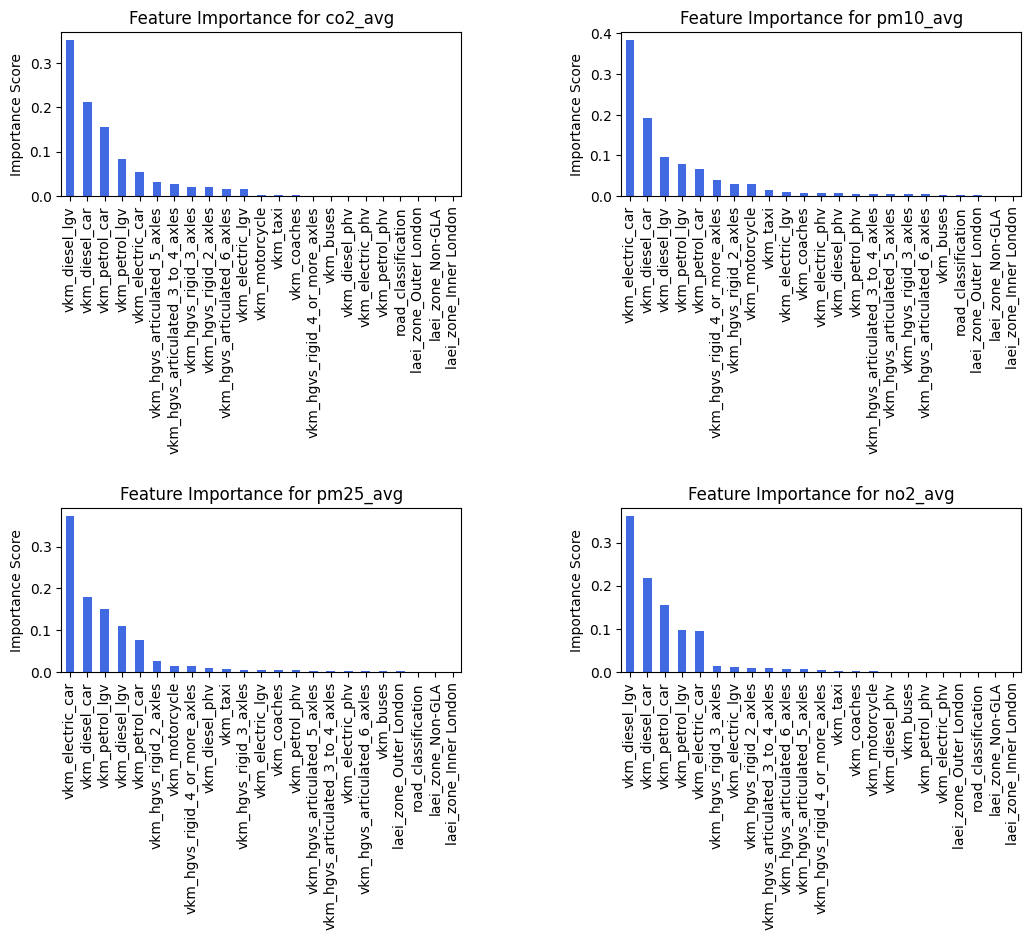

In [15]:
utils.plot_feature_importance(rf_model.estimators_, X, y)

<hr style="border: 2px solid blue;">

### Step 2.3: Ridge Multi-Output Regressor

In [28]:
from sklearn.linear_model import Ridge

In [29]:

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

Ridge()

In [30]:
# Predict emissions for each target variable
y_pred_ridge = ridge_model.predict(X_test_scaled)


=== Ridge Regressor Evaluation Metrics ===


,MAE,R² Score,MSE,RMSE
co2_avg,0.971460,0.995176,6.137784e+00,2.477455
pm10_avg,0.000427,0.888105,3.299370e-06,0.001816
pm25_avg,0.000187,0.939058,5.716951e-07,0.000756
no2_avg,0.002440,0.990052,5.224498e-05,0.007228
Overall,0.243629,0.953098,1.534460e+00,1.238733


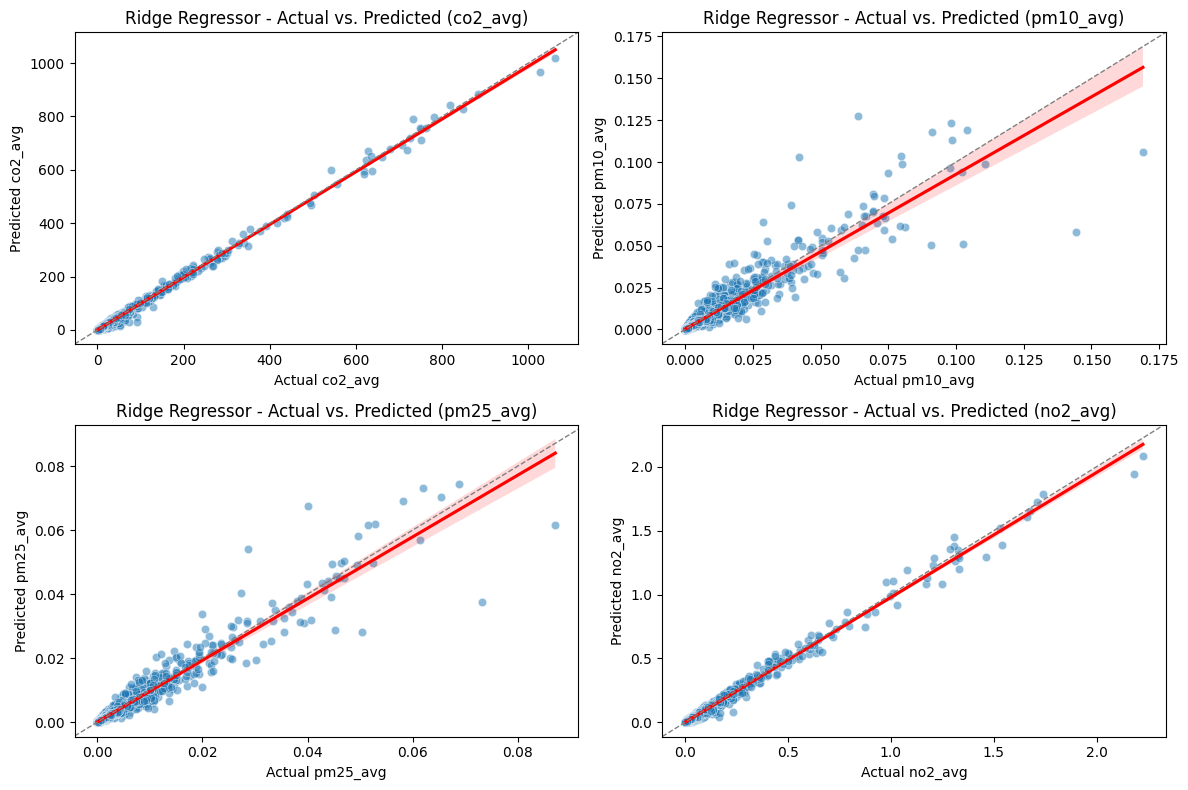

In [31]:
# Evaluate performance
eval_matrix_ridge = utils.evaluate_regressor(y_test, y_pred_ridge, model_name='Ridge Regressor')

In [32]:
# Evaluate performance
eval_matrix_ridge = utils.compare_predictions(y_test, y_pred_ridge, model_name='Ridge Regressor')


=== Ridge Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,13.763299,13.958625,0.000625,0.000766,0.000253,0.000294,0.035623,0.029315
1,0.672533,1.393358,0.000304,0.000445,0.000160,0.000238,0.007707,0.008747
2,4.882992,4.258893,0.000217,0.000385,0.000387,0.000388,0.004953,0.005062
3,11.890281,11.476177,0.001835,0.001465,0.000487,0.000473,0.002823,0.002391
4,15.077523,14.124538,0.001317,0.001276,0.005155,0.005856,0.000808,0.002267


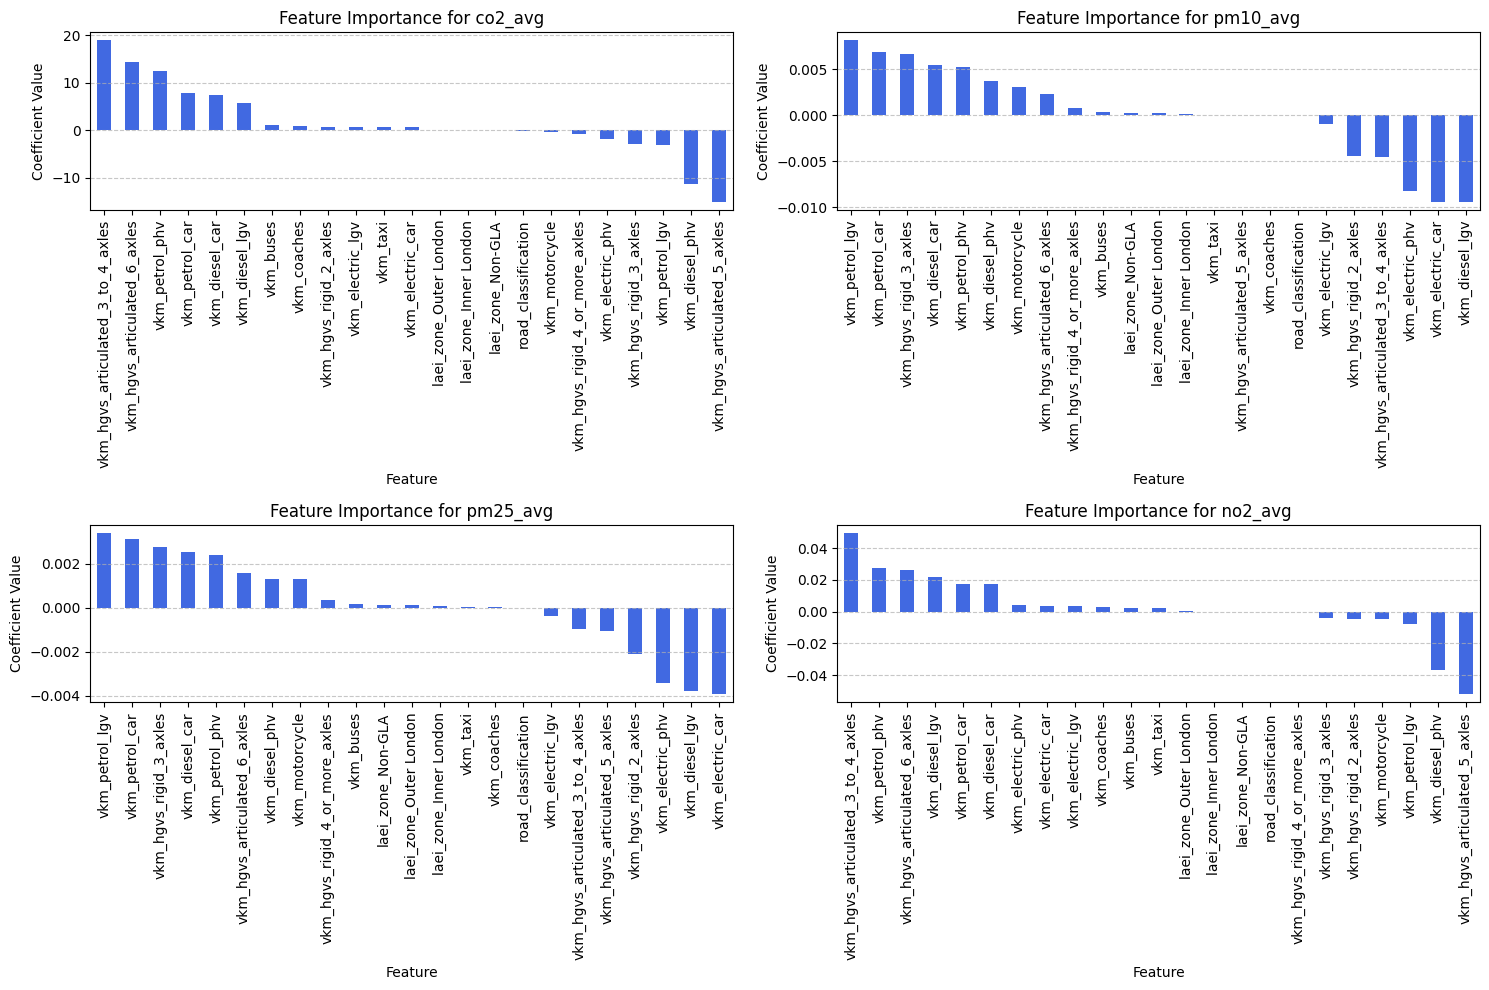

In [33]:
# plot feature importance for ridge model
utils.plot_ridge_feature_importance(ridge_model, X, y.columns)

<hr style="border: 2px solid blue;">

### Step 2.4: Multi-layer Perceptron Multi-Output Regressor

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.compose import TransformedTargetRegressor

# Scale training data and store the scaler
X_train_scaled, y_train_scaled, scaler_X, scaler_y = utils.scale_data(X_train, y_train, fit_scaler=True)

# Scale test data using the same scaler (ensures consistency)
X_test_scaled, y_test_scaled, _, _ = utils.scale_data(X_test, y_test, scaler_X=scaler_X, scaler_Y=scaler_y, fit_scaler=False)

pipeline = Pipeline([
        ('scaler', scaler_X),
        ('mlp', MLPRegressor(max_iter=500, random_state=42))
    ])
    
# Wrap the pipeline with TransformedTargetRegressor to scale the target values.
# This ensures that during prediction, the outputs are automatically inverse transformed
# back to the original (unnormalized) space.
mlp_model = TransformedTargetRegressor(regressor=pipeline, transformer=scaler_y)

mlp_model.fit(X_train_scaled, y_train_scaled)

TransformedTargetRegressor(regressor=Pipeline(steps=[('scaler',
                                                      StandardScaler()),
                                                     ('mlp',
                                                      MLPRegressor(max_iter=500,
                                                                   random_state=42))]),
                           transformer=StandardScaler())

In [48]:
# Predict emissions for each target variable
y_pred_mlp = mlp_model.predict(X_test_scaled)

# transform back to unstandardized values
y_pred = scaler_y.inverse_transform(y_pred)


=== MLP Regressor Evaluation Metrics ===


,MAE,R² Score,MSE,RMSE
co2_avg,7.610070,0.010832,1258.689999,35.478021
pm10_avg,0.379845,-33026.173688,0.973852,0.986839
pm25_avg,0.360491,-111853.098463,1.049304,1.024356
no2_avg,0.271580,-181.879706,0.960415,0.980008
Overall,2.155497,-36265.285256,315.418393,17.760022


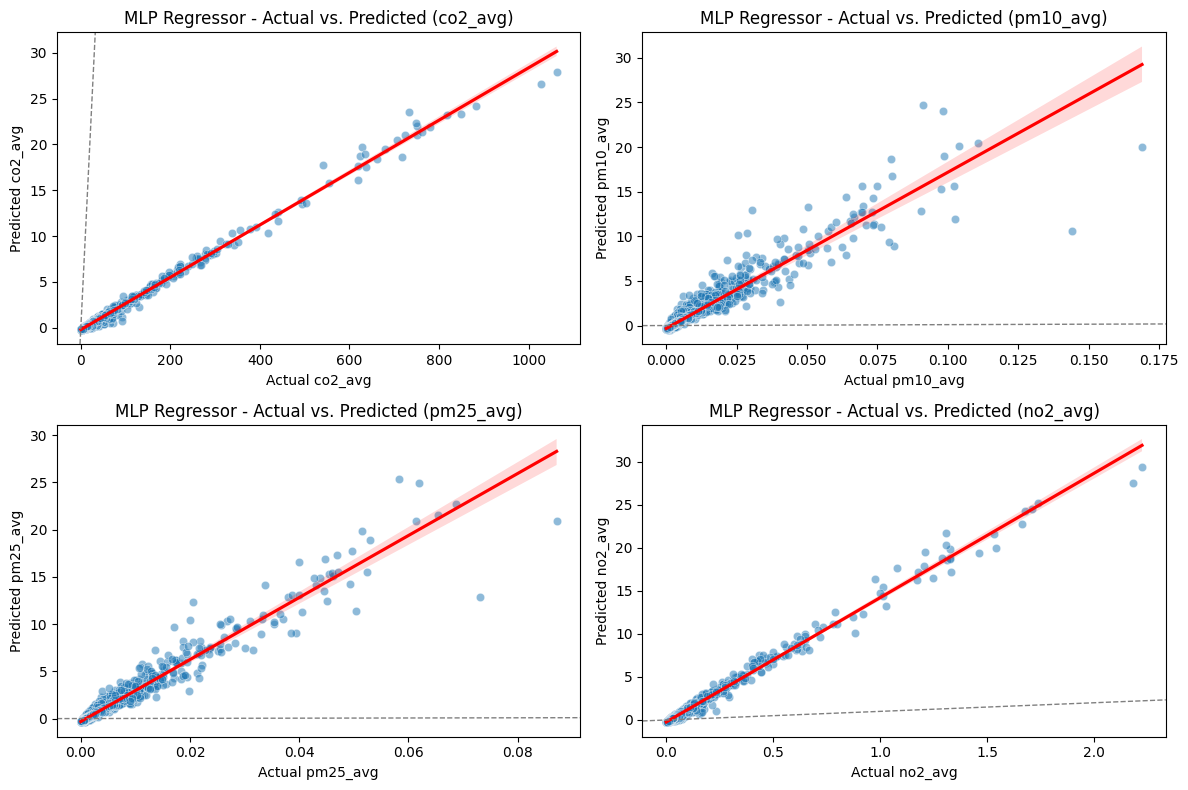

,MAE,R² Score,MSE,RMSE
co2_avg,7.610070,0.010832,1258.689999,35.478021
pm10_avg,0.379845,-33026.173688,0.973852,0.986839
pm25_avg,0.360491,-111853.098463,1.049304,1.024356
no2_avg,0.271580,-181.879706,0.960415,0.980008
Overall,2.155497,-36265.285256,315.418393,17.760022


In [49]:
utils.evaluate_regressor(y_test, y_pred_mlp, model_name='MLP Regressor')

In [50]:
utils.compare_predictions(y_test, y_pred_mlp, model_name='MLP Regressor')


=== MLP Regressor - Actual vs. Predicted Comparison ===


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,0.000000,-0.213866,0.000285,-0.315255,0.000013,-0.358261,0.053309,0.517002
1,1.248645,-0.194187,0.000075,-0.311665,0.000219,-0.242229,0.003311,-0.191437
2,10.792778,0.193225,0.000991,-0.163675,0.046286,15.088687,0.011437,-0.064032
3,4.493137,-0.110848,0.000022,-0.358233,0.000041,-0.328997,0.002940,-0.208974
4,5.715856,-0.038424,0.000247,-0.307870,0.000457,-0.177493,0.001109,-0.229271


,Actual_co2_avg,Predicted_co2_avg,Actual_pm10_avg,Predicted_pm10_avg,Actual_pm25_avg,Predicted_pm25_avg,Actual_no2_avg,Predicted_no2_avg
0,0.000000,-0.213866,0.000285,-0.315255,0.000013,-0.358261,0.053309,0.517002
1,1.248645,-0.194187,0.000075,-0.311665,0.000219,-0.242229,0.003311,-0.191437
2,10.792778,0.193225,0.000991,-0.163675,0.046286,15.088687,0.011437,-0.064032
3,4.493137,-0.110848,0.000022,-0.358233,0.000041,-0.328997,0.002940,-0.208974
4,5.715856,-0.038424,0.000247,-0.307870,0.000457,-0.177493,0.001109,-0.229271


<hr style="border: 2px solid blue;">

### Step 2.5: XGBoost Model After Hyperparameters Tuning (GridSearchCV) 

In [34]:
param_grid_xgb = {
    "estimator__n_estimators": [100, 200, 300],
    "estimator__learning_rate": [0.01, 0.1, 0.2],
    "estimator__max_depth": [3, 5, 7]
}

utils.smart_grid_search(xgb, "XGBoost Regressor", param_grid_xgb, X_train_scaled, y_train, X_test_scaled, y_test, cv_splits=5)


🔍 Running Grid Search for XGBoost Regressor...

Fitting 5 folds for each of 27 candidates, totalling 135 fits

✅ Best Parameters for XGBoost Regressor: {'estimator__learning_rate': 0.1, 'estimator__max_depth': 5, 'estimator__n_estimators': 100}
📊 Test MSE: 13.1517, Test MAE: 0.2708, Test R²: 0.9346

💾 Model saved: ./checkpoints/XGBoost Regressor_best_model.pkl


{'best_model': MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                             callbacks=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=None, device=None,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None,
                                             feature_types=None, gamma=None,
                                             grow_policy=None,
                                             importance_type=None,
                                             interaction_constraints=None,
                                             learning_rate=0.1, max_bin=None,
                                             max_cat_threshold=N

<hr style="border: 2px solid blue;">

### Step 2.6: Random Forest Model After Hyperparameters Tuning (Random GridSearchCV) 

In [77]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}

rf_results = utils.smart_grid_search_advanced(
    rf_model, "RandomForest", param_grid_rf, X_train_scaled, y_train, X_test_scaled, y_test, 
    cv_splits=5, use_random_search=True)


🔍 Running Randomized Search for RandomForest...

Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best Parameters for RandomForest: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': None}
📊 Test MSE: 4.1972, Test MAE: 0.2273, Test R²: 0.9542

💾 Model saved: ./checkpoints/RandomForest_best_model.pkl


<hr style="border: 2px solid blue;">

### Step 2.7: Ridge Model After Hyperparameters Tuning (GridSearchCV) 

In [ ]:
param_grid_ridge = {"alpha": [0.01, 0.1, 1, 10, 100]}

ridge_results = utils.smart_grid_search(
    ridge_model, "Ridge", param_grid_ridge, X_train_scaled, y_train, X_test_scaled, y_test, cv_splits=5
)


🔍 Running Grid Search for Ridge...

Fitting 5 folds for each of 5 candidates, totalling 25 fits

✅ Best Parameters for Ridge: {'alpha': 1}
📊 Test MSE: 1.5345, Test MAE: 0.2436, Test R²: 0.9531

💾 Model saved: ./checkpoints/Ridge_best_model.pkl


<hr style="border: 2px solid blue;">

### Step 2.8: MLP Model After Hyperparameters Tuning (Random GridSearchCV) 

In [76]:
mlp_tuned_model = MLPRegressor(max_iter=500, random_state=42)

param_grid_mlp = {
    "regressor__mlp__hidden_layer_sizes": [(64, 128), (128, 256), (128, 256, 128)],
    "regressor__mlp__activation": ["relu", "tanh"],
    "regressor__mlp__solver": ["adam", "lbfgs"],
    "regressor__mlp__learning_rate_init": [0.001, 0.01]
}

mlp_results = utils.smart_grid_search_advanced(
    mlp_tuned_model, "MLP Regressor", param_grid_mlp, X_train_scaled, y_train_scaled, X_test_scaled, y_test_scaled, 
    cv_splits=5, apply_target_scaling=True, use_random_search=True
)



🔍 Running Randomized Search for MLP Regressor...

⚡ Applying target scaling for MLPRegressor...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

✅ Best Parameters for MLP Regressor: {'regressor__mlp__solver': 'adam', 'regressor__mlp__learning_rate_init': 0.001, 'regressor__mlp__hidden_layer_sizes': (128, 256, 128), 'regressor__mlp__activation': 'relu'}
📊 Test MSE: 0.0368, Test MAE: 0.0382, Test R²: 0.9673

💾 Model saved: MLP Regressor_best_model.pkl
